In [55]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

In [56]:
res = 8192
gau = 9
t_l = 60
t_h = 100
lenth = 1024

(8192, 8192, 3)
(8192, 8192, 3)
(8192, 8192)


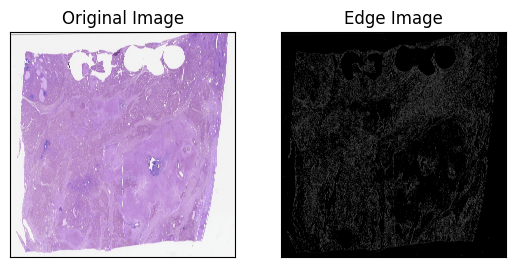

In [57]:
img = cv.imread(f'/Users/zhangenzhi/Desktop/zez/samples/149600-2019-01-00-03-01/rescaled_image_0_{res}x{res}.png') 

img = cv.resize(img, (res,res))
print(img.shape)
grey_img = cv.GaussianBlur(img, (gau,gau), 0)
print(grey_img.shape)
edges = cv.Canny(grey_img, t_l, t_h)
print(edges.shape)

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
ax.axis('off')
pdf_path = f"./edge_{res}.pdf"
plt.savefig(pdf_path, bbox_inches='tight')
plt.close(fig)

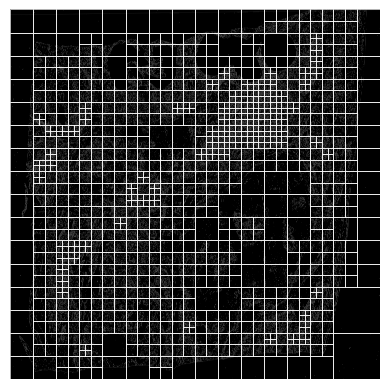

1024


In [58]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=lenth)
qdt.draw(ax=ax)
ax.axis('off')
pdf_path = f"./ap_{lenth}.pdf"
plt.savefig(pdf_path, transparent=True, bbox_inches='tight')
plt.show()
print(qdt.count_patches())
plt.close()

(1024, 8, 8, 3)
de mask: (8192, 8192, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-98..356].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-98..356].


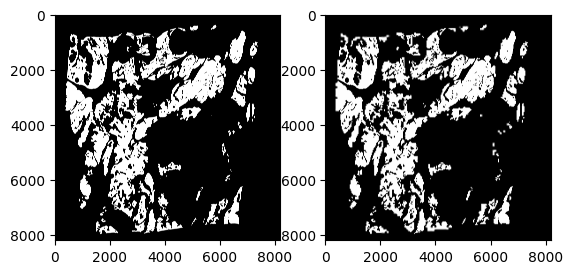

In [59]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size, patch_size, channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

mask = cv.imread(f'/Users/zhangenzhi/Desktop/zez/samples/149600-2019-01-00-03-01/rescaled_mask_0_{res}x{res}.png') 


seq = patchify(mask=mask, patch_size=8, channel=3)
print(np.asarray(seq).shape)

plt.subplot(121)
plt.imshow(mask)


remask= depatchify(seq=seq, patch_size=8, channel=3)
remask = remask.astype(int)
plt.subplot(122)
plt.imshow(remask)
ax.imshow(remask, cmap = 'gray')
plt.show()
plt.close()

In [60]:
np.sum(mask[:,:,1])

3885338051

In [61]:
np.sum(remask[:,:,1])

3873866352

In [62]:
def dice_score(array1, array2):
    # Ensure arrays are binary
    array1 = array1.astype(bool)
    array2 = array2.astype(bool)

    # Calculate intersection and sizes
    intersection = np.logical_and(array1, array2).sum()
    size_sum = array1.sum() + array2.sum()

    # Avoid division by zero
    if size_sum == 0:
        return 1.0  # Both arrays are empty, so they match perfectly

    return 2.0 * intersection / size_sum
print(dice_score(mask[:,:,1],remask[:,:,1]))

0.7940743259144111
